In [2]:
import json
import pandas as pd
from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection  import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [3]:
# import label data
with open('C:\\Users\\Gina\\Lab\\kidney\\kits21\\kits21\\data\\kits.json') as f:
    data = json.load(f)

def print_count(data, col_name):
    _type = [ case[col_name] for case in data ]
    _count = {}
    for label in set(_type):
        _count[label] = _type.count(label)
        
    print(_count)
    return _count

tumor_count = print_count(data, 'tumor_histologic_subtype')
print('-' * 20)
print_count(data, 'pathology_t_stage')
print('-' * 20)
print_count(data, 'tumor_isup_grade')
print('-' * 20)
print_count(data, 'malignant')

{'clear_cell_rcc': 204, 'urothelial': 3, 'mest': 3, 'other': 1, 'spindle_cell_neoplasm': 1, 'collecting_duct_undefined': 1, 'multilocular_cystic_rcc': 1, 'chromophobe': 27, 'oncocytoma': 16, 'rcc_unclassified': 2, 'papillary': 28, 'wilms': 1, 'angiomyolipoma': 5, 'clear_cell_papillary_rcc': 7}
--------------------
{'3': 70, '1b': 59, '4': 5, '2a': 15, '0': 25, '1a': 121, '2b': 5}
--------------------
{1: 33, 2: 119, 3: 66, 4: 26, None: 56}
--------------------
{False: 25, True: 275}


{False: 25, True: 275}

In [4]:
kits_data = pd.DataFrame(data)

In [5]:
kits_data.groupby(['malignant', 'tumor_histologic_subtype']).size()

malignant  tumor_histologic_subtype 
False      angiomyolipoma                 5
           mest                           3
           oncocytoma                    16
           spindle_cell_neoplasm          1
True       chromophobe                   27
           clear_cell_papillary_rcc       7
           clear_cell_rcc               204
           collecting_duct_undefined      1
           multilocular_cystic_rcc        1
           other                          1
           papillary                     28
           rcc_unclassified               2
           urothelial                     3
           wilms                          1
dtype: int64

In [6]:
kits_data.groupby(['malignant', 'pathology_t_stage']).size()

malignant  pathology_t_stage
False      0                     25
True       1a                   121
           1b                    59
           2a                    15
           2b                     5
           3                     70
           4                      5
dtype: int64

In [7]:
kits_data.groupby(['tumor_isup_grade', 'pathology_t_stage']).size()

tumor_isup_grade  pathology_t_stage
1.0               1a                   24
                  1b                    7
                  2a                    1
                  3                     1
2.0               1a                   71
                  1b                   28
                  2a                    4
                  2b                    2
                  3                    14
3.0               1a                   16
                  1b                   14
                  2a                    2
                  2b                    1
                  3                    33
4.0               1a                    1
                  1b                    4
                  2a                    4
                  3                    13
                  4                     4
dtype: int64

In [6]:
tumor_count.keys()

dict_keys(['clear_cell_papillary_rcc', 'collecting_duct_undefined', 'oncocytoma', 'papillary', 'urothelial', 'angiomyolipoma', 'clear_cell_rcc', 'other', 'rcc_unclassified', 'multilocular_cystic_rcc', 'chromophobe', 'spindle_cell_neoplasm', 'mest', 'wilms'])

Text(0, 0.5, 'Count')

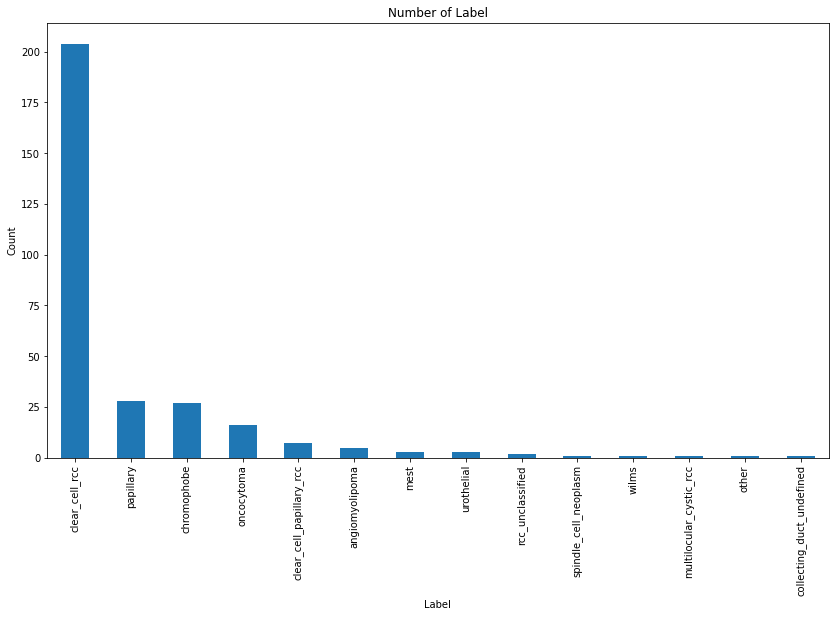

In [7]:
# Print the label distribution
ax = kits_data['tumor_histologic_subtype'].value_counts().plot(kind='bar',
                                           figsize=(14,8),
                                           title="Number of Label")
ax.set_xlabel("Label")
ax.set_ylabel("Count")

In [8]:
df = pd.read_csv("C:\\Users\\Gina\\Lab\\kidney\\radiomics\\result\\299_radiomics_feature.csv", index_col=0)

# drop useless columns
df = df.iloc[:, 37:]

In [9]:
# drop uesless type data
df['tumor_type'] = kits_data['tumor_histologic_subtype']
df['malignant'] = kits_data['malignant']

useless_type = ['rcc_unclassified',
                'urothelial',
                'mest',
                'collecting_duct_undefined',
                'oncocytoma',
                'clear_cell_papillary_rcc', 
                'multilocular_cystic_rcc', 
                'other', 'wilms', 
                'angiomyolipoma', 'spindle_cell_neoplasm']

for _type in useless_type:
    df_remove = df.drop(df.loc[df['tumor_type'] == _type].index)

left data: 300


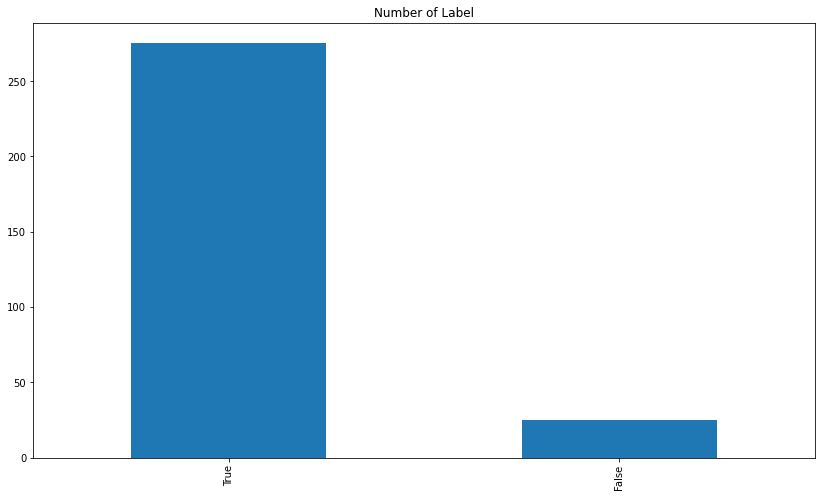

In [10]:
ax = df['malignant'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Label")

print('left data:', len(df))

In [11]:
label = df['malignant']
df = df.drop(columns='malignant')
df = df.drop(columns='tumor_type')

train_X, test_X, train_y, test_y = train_test_split(df, label, test_size = 0.2)

In [12]:
df.head(5)

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,0.862742,0.760160,20.154583,26.513595,28.844410,28.017851,30.479501,31.511903,8412.125000,22.874397,...,0.056744,0.003653,0.243141,138.872941,0.001281,0.492637,0.002118,1332.393121,0.141763,1.236767
1,0.195262,0.155003,14.697807,94.822870,21.470911,25.942244,55.605755,67.253253,4448.916667,18.515323,...,0.178399,0.006561,0.147414,35.903653,0.001559,0.774044,0.002574,373.181512,0.041588,0.853819
2,0.891811,0.743956,31.774654,42.710380,47.169906,47.801674,47.127487,49.739320,36899.333333,38.089603,...,0.447999,0.008529,0.071891,14.242139,0.001250,4.385980,0.000390,405.355626,0.018624,0.224885
3,0.915818,0.870112,23.776610,27.325904,32.015621,30.364453,32.893768,33.615473,11405.458333,25.025563,...,0.078068,0.003506,0.154113,62.725981,0.000871,0.904840,0.001255,765.979214,0.049422,0.660940
4,0.749441,0.696361,26.762209,38.431538,44.721360,33.615473,44.283180,46.303348,20924.958333,28.802174,...,0.121453,0.003647,0.098878,30.431140,0.000734,1.587414,0.000810,467.936095,0.036467,0.355561


In [17]:
print('training data:', len(train_X))
print('testing data:', len(test_X))
print('-' * 20)
print('train:', train_y.value_counts())
print('test:', test_y.value_counts())

ori_train_X = train_X
ori_train_y = train_y

training data: 240
testing data: 60
--------------------
train: True     218
False     22
Name: malignant, dtype: int64
test: True     57
False     3
Name: malignant, dtype: int64


## Oversampling for malignant data

using the package imblearn

In [56]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.3, random_state=0)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

train_X, train_y = pipeline.fit_resample(ori_train_X, ori_train_y)

print('train:', train_y.value_counts())

train: True     130
False     65
Name: malignant, dtype: int64


## SVC

In [86]:
clf = make_pipeline(SVC(gamma='auto')) # StandardScaler()
clf.fit(train_X, train_y)

clf_predict_y = clf.predict(test_X)

labels=[True, False]

cf_matrix = confusion_matrix(test_y, clf_predict_y, labels=labels)
accuracy = metrics.accuracy_score(test_y, clf_predict_y)
print(accuracy)

auc = roc_auc_score(test_y, clf_predict_y)
print('auc:', auc)

print(cf_matrix)
print(labels)

0.95
auc: 0.5
[[57  0]
 [ 3  0]]
[True, False]


In [87]:
# default kernal is rbf
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

param_grid = [
    { 'kernel': ['poly'], 'degree': [3, 4, 5], 'coef0': [0, 1], 'gamma': ['scale', 'auto'] },
    { 'C': [0.5, 1, 1.5], 'gamma': ['scale', 'auto'] }
]

svc_clf = SVC()
grid_search = GridSearchCV(svc_clf, param_grid, cv=5,
                          scoring='accuracy')

grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'coef0': [0, 1], 'degree': [3, 4, 5],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']},
                         {'C': [0.5, 1, 1.5], 'gamma': ['scale', 'auto']}],
             scoring='accuracy')

In [89]:
print('best params:', grid_search.best_params_)

best_svc_clf = grid_search.best_estimator_
best_predict_y = best_svc_clf.predict(test_X)

# evaluation
accuracy = metrics.accuracy_score(test_y, best_predict_y)
print('acc:', accuracy)

auc = roc_auc_score(test_y, clf_predict_y)
print('auc:', auc)

print('confusion_matrix:\n', confusion_matrix(test_y, best_predict_y, labels=labels))
print(labels)

best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
acc: 0.95
auc: 0.5
confusion_matrix:
 [[57  0]
 [ 3  0]]
[True, False]


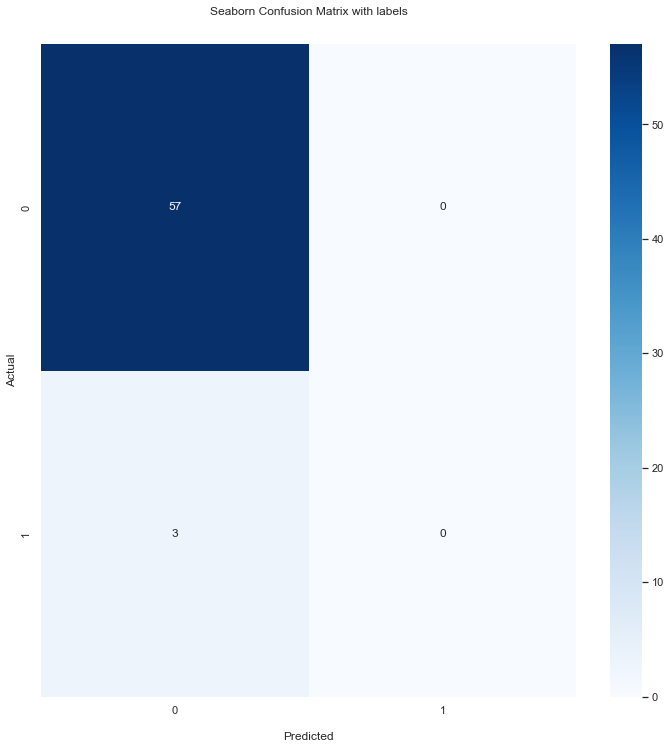

In [62]:
def plot_confusion(cf_matrix, labels):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    sns.set(rc={'figure.figsize':(12, 12)})

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted')
    ax.set_ylabel('Actual');

    ## Ticket labels - List must be in alphabetical order
    # ax.xaxis.set_ticklabels(labels)
    # ax.yaxis.set_ticklabels(labels)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

plot_confusion(cf_matrix, labels)

## Random Forest

In [63]:
forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(train_X, train_y)

# predict
rf_predict_y = forest.predict(test_X)

# evaluation
accuracy = metrics.accuracy_score(test_y, clf_predict_y)
print(accuracy)

print('confusion_matrix:\n', confusion_matrix(test_y, clf_predict_y, labels=labels))
print(labels)

0.95
confusion_matrix:
 [[57  0]
 [ 3  0]]
[True, False]


## Grid Search for params

In [64]:
param_grid = [
    {'n_estimators': [10, 30, 100], 'max_depth': [5, 10, 20, None]}
]

forest_clf = ensemble.RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          scoring='accuracy')

grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 20, None],
                          'n_estimators': [10, 30, 100]}],
             scoring='accuracy')

In [65]:
print('best params:', grid_search.best_params_)

best_rf = grid_search.best_estimator_
best_rf_predict_y = best_rf.predict(test_X)

# evaluation
accuracy = metrics.accuracy_score(test_y, best_rf_predict_y)
print('test acc:', accuracy)
print('train acc:', metrics.accuracy_score(train_y, best_rf.predict(train_X)))

print('confusion_matrix:\n', confusion_matrix(test_y, rf_predict_y, labels=labels))
print(labels)

best params: {'max_depth': None, 'n_estimators': 100}
test acc: 0.9166666666666666
train acc: 1.0
confusion_matrix:
 [[54  3]
 [ 2  1]]
[True, False]


In [49]:
# le = LabelEncoder()
# le.fit(train_y)
# print(le.classes_)
# encoded_train_y = le.transform(train_y)

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# print(roc_auc_score(test_y_mapping, forest.predict_proba(test_X), multi_class='ovr'))
# fpr, tpr, threshold = roc_auc_score(test_y, rf_predict_y, multiclass='ovo')
# print(fpr, tpr, threshold)

# auc1 = auc(fpr, tpr)
# ## Plot the result
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()    


## Feature Selection for Random Forest

TypeError: can only concatenate str (not "numpy.bool_") to str

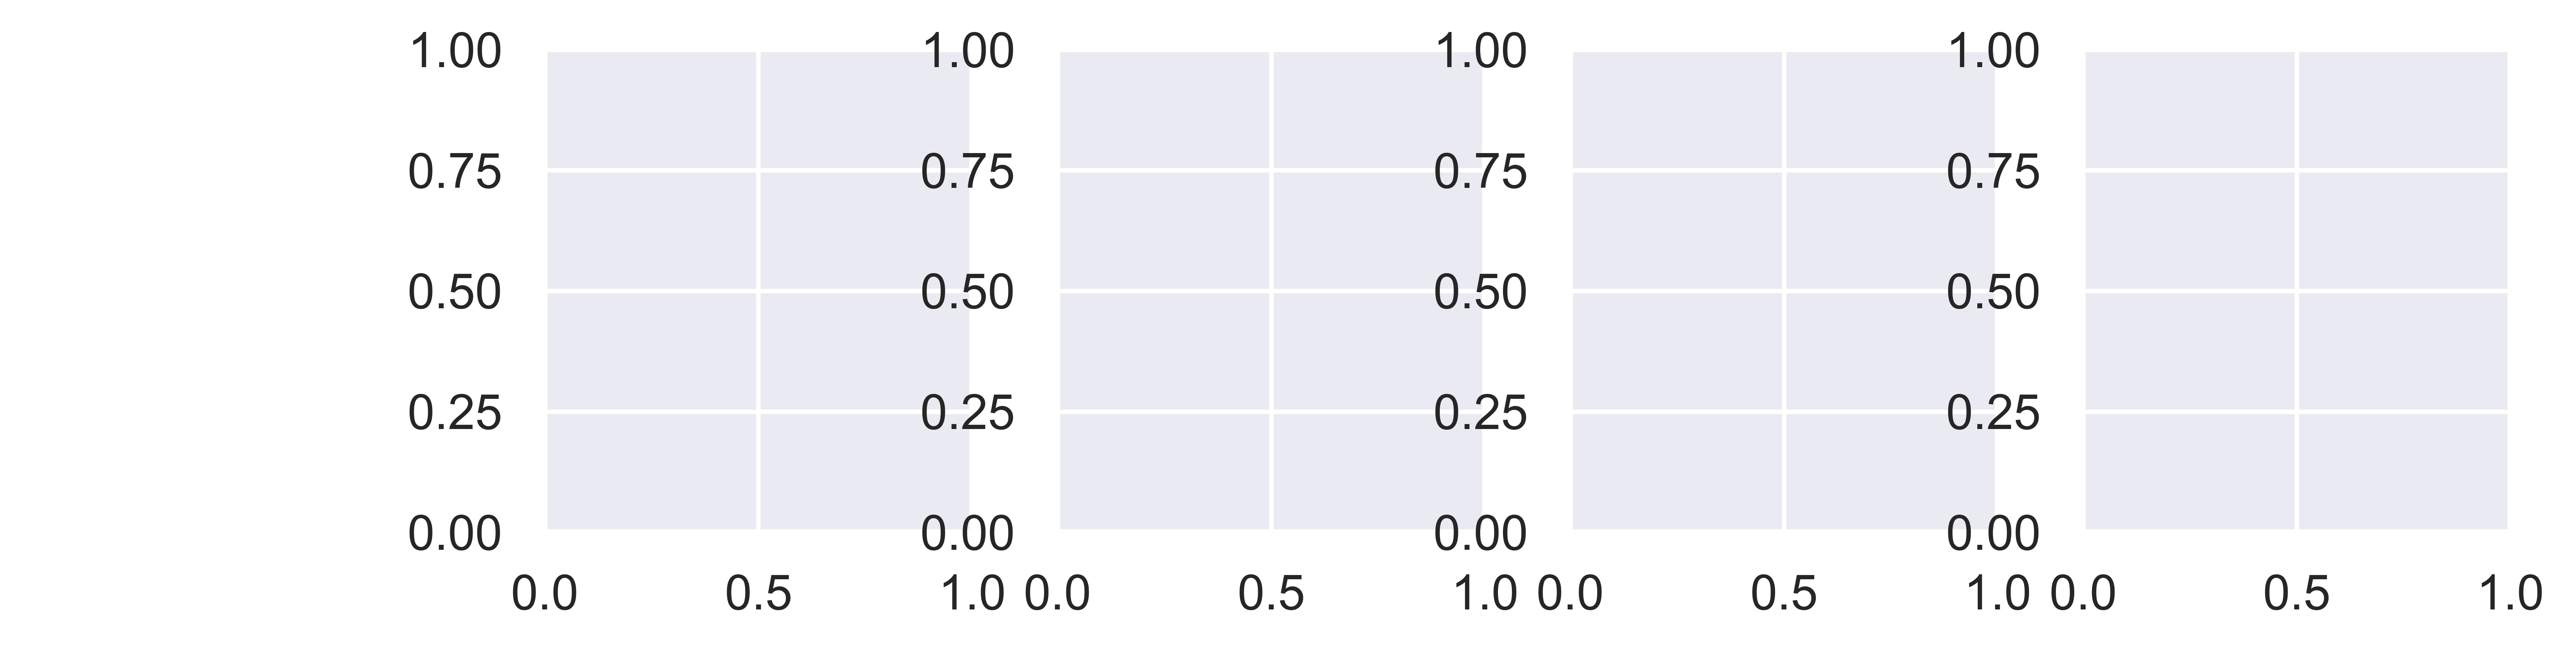

In [66]:
from sklearn import tree

# This may not the best way to view each estimator as it is small
fn=df.columns
cn=label
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(forest.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_individualtree.png')

In [53]:
import xgboost as xgb
import numpy as np

# clf1 = xgb.XGBClassifier()

# param_dist = {
#     'n_estimators': [80, 100, 150],
#     'max_depth': [5, 10, 15],
#     'learning_rate' : [0.01, 0.1, 0.5, 1],
#     'subsample' : [0.7, 0.8, 0.9],
#     'colsample_bytree' : [0.5, 0.7, 0.9],
#     'min_child_weight' : [3, 5, 7]
# }

# grid_search = GridSearchCV(clf1, param_dist, cv = 5, scoring = 'accuracy')

# grid_search.fit(train_X, train_y)

# best_estimator = grid_search.best_estimator_

# print(best_estimator)

# print('best params:', grid_search.best_params_)

# best_rf = grid_search.best_estimator_
# best_rf_predict_y = best_rf.predict(test_X)

# # evaluation
# accuracy = metrics.accuracy_score(test_y, best_rf_predict_y)
# print('acc:', accuracy)

# print('confusion_matrix:\n', confusion_matrix(test_y, rf_predict_y, labels=labels))
# print(labels)

### Original Data

In [67]:
wavelet_column = []
log_column = []

for item in df.columns:
    if 'wavelet' in item:
        wavelet_column.append(item)
    elif 'log' in item:
        log_column.append(item)

print('wavelet including 8 filter:', len(wavelet_column))
print('log including 5 params:', len(log_column))

wavelet including 8 filter: 744
log including 5 params: 465


In [68]:
print(wavelet_column[:5])
print(log_column[:5])

['wavelet-LLH_firstorder_10Percentile', 'wavelet-LLH_firstorder_90Percentile', 'wavelet-LLH_firstorder_Energy', 'wavelet-LLH_firstorder_Entropy', 'wavelet-LLH_firstorder_InterquartileRange']
['log-sigma-1-0-mm-3D_firstorder_10Percentile', 'log-sigma-1-0-mm-3D_firstorder_90Percentile', 'log-sigma-1-0-mm-3D_firstorder_Energy', 'log-sigma-1-0-mm-3D_firstorder_Entropy', 'log-sigma-1-0-mm-3D_firstorder_InterquartileRange']


In [69]:
# original image and features
df_original = df.drop(wavelet_column, axis=1)
df_original = df_original.drop(log_column, axis=1)

# log
print(df_original.shape)

(300, 107)


In [70]:
df_wavelet = df[wavelet_column]
df_log = df[log_column]

print(df_wavelet.shape)
print(df_log.shape)

(300, 744)
(300, 465)


In [71]:
wavelet_LLH = [ col for col in wavelet_column if 'LLH' in col]
wavelet_LHL = [ col for col in wavelet_column if 'LHL' in col]
wavelet_HLL = [ col for col in wavelet_column if 'HLL' in col]

wavelet_LHH = [ col for col in wavelet_column if 'LHH' in col]
wavelet_HLH = [ col for col in wavelet_column if 'HLH' in col]
wavelet_HHL = [ col for col in wavelet_column if 'HHL' in col]

wavelet_HHH = [ col for col in wavelet_column if 'HHH' in col]

print('LLH:', len(wavelet_LLH))
print('LHL:', len(wavelet_LHL))
print('HLL:', len(wavelet_HLL))

print('LHH:', len(wavelet_LHH))
print('HLH:', len(wavelet_HLH))
print('HHL:', len(wavelet_HHL))

print('HHH:', len(wavelet_HHH))

df_wavelet_LLH = df[wavelet_LLH]
df_wavelet_LHL = df[wavelet_LHL]
df_wavelet_HLL = df[wavelet_HLL]

df_wavelet_LHH = df[wavelet_LHH]
df_wavelet_HLH = df[wavelet_HLH]
df_wavelet_HHL = df[wavelet_HHL]

df_wavelet_HHH = df[wavelet_HHH]


LLH: 93
LHL: 93
HLL: 93
LHH: 93
HLH: 93
HHL: 93
HHH: 93


In [72]:
log_filter = []
df_log_list = []

for idx in range(1, 6):
    matched_col = [ col for col in log_column if f"log-sigma-{idx}-0" in col]
    log_filter.append(matched_col)

    df_log_list.append(df[matched_col])
    print('df log', idx, ':', df_log_list[idx - 1].shape)

df log 1 : (300, 93)
df log 2 : (300, 93)
df log 3 : (300, 93)
df log 4 : (300, 93)
df log 5 : (300, 93)


In [101]:
records = []
record = { 'data': 'none', 'method': 'none', 'train acc': 0, 'test acc': 0, 'auc': 0 }


def grid_search_evaluate(train_X, train_y, test_X, test_y, grid_search, method_name, data_type):
    print('best params:', grid_search.best_params_)

    best_clf = grid_search.best_estimator_
    best_clf_predict_y = best_clf.predict(test_X)

    # evaluation
    train_accuracy = metrics.accuracy_score(train_y, best_clf.predict(train_X))
    accuracy = metrics.accuracy_score(test_y, best_clf_predict_y)
    print('train acc:', train_accuracy)
    print('test acc:', accuracy)

    auc = roc_auc_score(test_y, best_clf_predict_y)
    print('auc:', auc)

    print('confusion_matrix:\n', confusion_matrix(test_y, best_clf_predict_y, labels=labels))

    record['data'] = data_type
    record['method'] = method_name
    record['train acc'] = train_accuracy
    record['test acc'] = accuracy
    record['auc'] = auc
    records.append(record.copy())

def SVC_grid_search(train_X, train_y, test_X, test_y, type_name):
    parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

    param_grid = [
        { 'kernel': ['poly'], 'degree': [3, 4, 5], 'coef0': [0, 1], 'gamma': ['scale', 'auto'] },
        { 'C': [0.5, 1, 1.5], 'gamma': ['scale', 'auto'] }
    ]

    svc_clf = SVC()
    grid_search = GridSearchCV(svc_clf, param_grid, cv=5,
                            scoring='accuracy')

    grid_search.fit(train_X, train_y)
    # Evaluation
    grid_search_evaluate(train_X, train_y, test_X, test_y, grid_search, 'SVM', type_name)


def RF_grid_search(train_X, train_y, test_X, test_y, type_name):
    param_grid = [
        {'n_estimators': [10, 30, 100], 'max_depth': [5, 10, 20, None]}
    ]

    forest_clf = ensemble.RandomForestClassifier()
    grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                            scoring='accuracy')

    grid_search.fit(train_X, train_y)
    # Evaluation
    grid_search_evaluate(train_X, train_y, test_X, test_y, grid_search, 'Random Forest', type_name)


def run_predict(df_type, type_name):
    train_X, test_X, train_y, test_y = train_test_split(df_type, label, test_size = 0.2)

    # oversampling
    train_X, train_y = pipeline.fit_resample(train_X, train_y)

    # SVC
    SVC_grid_search(train_X, train_y, test_X, test_y, type_name)

    # Random Forest
    RF_grid_search(train_X, train_y, test_X, test_y, type_name)

In [102]:
run_predict(df_original, 'original')

best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
train acc: 0.6666666666666666
test acc: 0.9
auc: 0.5
confusion_matrix:
 [[54  0]
 [ 6  0]]
best params: {'max_depth': 20, 'n_estimators': 30}
train acc: 1.0
test acc: 0.9
auc: 0.6481481481481481
confusion_matrix:
 [[52  2]
 [ 4  2]]


In [103]:
run_predict(df_wavelet, 'wavelet')

best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
train acc: 0.696969696969697
test acc: 0.8666666666666667
auc: 0.48148148148148145
confusion_matrix:
 [[52  2]
 [ 6  0]]
best params: {'max_depth': 20, 'n_estimators': 100}
train acc: 1.0
test acc: 0.9166666666666666
auc: 0.6574074074074074
confusion_matrix:
 [[53  1]
 [ 4  2]]


In [104]:
run_predict(df_log, 'log')

best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
train acc: 0.6666666666666666
test acc: 0.9333333333333333
auc: 0.6160714285714286
confusion_matrix:
 [[55  1]
 [ 3  1]]
best params: {'max_depth': 10, 'n_estimators': 100}
train acc: 1.0
test acc: 0.9166666666666666
auc: 0.49107142857142855
confusion_matrix:
 [[55  1]
 [ 4  0]]


In [105]:
wavelet_filters = [ df_wavelet_LLH, 
                    df_wavelet_LHL,
                    df_wavelet_HLL,
                    df_wavelet_LHH,
                    df_wavelet_HLH,
                    df_wavelet_HHL,
                    df_wavelet_HHH
                  ]
col_name = ['LLH',
            'LHL',
            'HLL',
            'LHH',
            'HLH',
            'HHL',
            'HHH']

for idx, wav_col in enumerate(wavelet_filters):
  print(col_name[idx], ":")
  run_predict(wav_col, 'wavelet_' + col_name[idx])
  print('-' * 30)

LLH :
best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
train acc: 0.6666666666666666
test acc: 0.9166666666666666
auc: 0.5
confusion_matrix:
 [[55  0]
 [ 5  0]]
best params: {'max_depth': None, 'n_estimators': 30}
train acc: 1.0
test acc: 0.8833333333333333
auc: 0.5727272727272726
confusion_matrix:
 [[52  3]
 [ 4  1]]
------------------------------
LHL :
best params: {'coef0': 0, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
train acc: 0.6717948717948717
test acc: 0.9166666666666666
auc: 0.49107142857142855
confusion_matrix:
 [[55  1]
 [ 4  0]]
best params: {'max_depth': 5, 'n_estimators': 10}
train acc: 0.958974358974359
test acc: 0.7333333333333333
auc: 0.39285714285714285
confusion_matrix:
 [[44 12]
 [ 4  0]]
------------------------------
HLL :
best params: {'coef0': 0, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
train acc: 0.6865671641791045
test acc: 0.85
auc: 0.5
confusion_matrix:
 [[51  0]
 [ 9  0]]
best params: {'max_depth': 10, 'n_estimators'

In [106]:
for idx, log_level in enumerate(df_log_list):
    print('-' * 10, 'log', idx+1, ":", '-' * 10)
    run_predict(log_level, 'log_' + str(idx + 1))

---------- log 1 : ----------
best params: {'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
train acc: 0.6666666666666666
test acc: 0.9166666666666666
auc: 0.5
confusion_matrix:
 [[55  0]
 [ 5  0]]
best params: {'max_depth': None, 'n_estimators': 100}
train acc: 1.0
test acc: 0.8666666666666667
auc: 0.5636363636363636
confusion_matrix:
 [[51  4]
 [ 4  1]]
---------- log 2 : ----------
best params: {'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
train acc: 0.6666666666666666
test acc: 0.8833333333333333
auc: 0.5
confusion_matrix:
 [[53  0]
 [ 7  0]]
best params: {'max_depth': 10, 'n_estimators': 100}
train acc: 1.0
test acc: 0.8333333333333334
auc: 0.4716981132075472
confusion_matrix:
 [[50  3]
 [ 7  0]]
---------- log 3 : ----------
best params: {'coef0': 0, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
train acc: 0.6820512820512821
test acc: 0.95
auc: 0.5
confusion_matrix:
 [[57  0]
 [ 3  0]]
best params: {'max_depth': 10, 'n_estimators': 100}
train acc: 1

In [109]:
result = pd.DataFrame(records)
result.to_csv('predict_malignant.csv')

# Conclusion
* Over-sampling for **oncocytoma**: 16', **chromophobe**: 27, **papillary**: 28 => Double these data
* Model:
    1. SVC
        * best params: {'C': 1, 'gamma': 'auto'}
        <!-- * acc: 0.9805825242718447 -->
    2. Random Forest
        * best params: {'max_depth': None, 'n_estimators': 100}
        <!-- * acc: 0.9514563106796117 -->